In [23]:
#Preencha Nome Completo e RM's dos integrantes
# 👤| Integrantes - RM :
# Augusto Barcelos Barros - 98078
# Gabriel Gribl de Carvalho - 96270
# Gabriel Souza de Queiroz - 98570
# Gabriela Zanotto Alves Rodrigues - 551629

In [24]:
# Carregando o dataset
import pandas as pd

X_read = pd.read_csv("data/guinchei-dados.csv")

# Primeiras 100 linhas
X_read[:100]

,NOME,MARCA,SITUAÇÃO,TIPO DE GUINCHO
0,HR,HYUNDAI,Pane mecânica,Guincho de cabo
1,1113,MERCEDES-BENZ,Acidente de trânsito,Guincho de plataforma
2,1214,MERCEDES-BENZ,Pneu furado,Guincho de cabo
3,1318,MERCEDES-BENZ,Problemas elétricos,Guincho elétrico
4,1519,MERCEDES-BENZ,Veículo preso ou atolado,Guincho de cabo
...,...,...,...,...
95,1944-S,MERCEDES-BENZ,Veículo sobrecarregado,Guincho de tambor
96,2038,MERCEDES-BENZ,Transporte especializado,Guincho Hidráulico
97,2418,MERCEDES-BENZ,Reboque de veículos desativados,Guincho de Reboque Especializado
98,2423,MERCEDES-BENZ,Situações de emergência,Guincho de resgate


In [25]:
# Crie uma instância do OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
import joblib


encoder = OneHotEncoder()

# Ajuste o encoder aos dados categóricos
encoder.fit(X_read[["NOME", "MARCA", "SITUAÇÃO"]])
# Nome e marca serão importantes no futuro, quando tiver mais dados, por isso, vamos mantê-los no dataset

# Transforme os dados categóricos em codificação one-hot
X = encoder.transform(X_read[["NOME", "MARCA", "SITUAÇÃO"]]).toarray()  # type: ignore


# Salve o encoder
joblib.dump(encoder, "model/one_hot_encoder.pickle")

X[:100]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
y = X_read['TIPO DE GUINCHO']
y

0                                 Guincho de cabo
1                           Guincho de plataforma
2                                 Guincho de cabo
3                                Guincho elétrico
4                                 Guincho de cabo
                          ...                    
195                             Guincho de tambor
196                            Guincho Hidráulico
197              Guincho de Reboque Especializado
198                            Guincho de resgate
199    Transporte de peças e equipamentos pesados
Name: TIPO DE GUINCHO, Length: 200, dtype: object

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
# Criar o modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500, random_state=42)

model.fit(x_train, y_train)

# salvar o modelo
joblib.dump(model, "model/model.pickle")

['model/model.pickle']

In [29]:
y_pred = model.predict(x_test)

In [30]:
# Verificar a acurácia, precisão e recall e f1-score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print(f'Precisão: {precision_score(y_test, y_pred, average="macro", zero_division=0)}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro", zero_division=0)}')
print(f'F1-Score: {f1_score(y_test, y_pred, average="macro")}')

Acurácia: 0.975
Precisão: 0.7777777777777778
Recall: 0.7777777777777778
F1-Score: 0.7777777777777778


In [31]:
tipos = X_read['TIPO DE GUINCHO'].unique()

In [32]:
# Contar quantos valores de cada tipo foram previstos
y_pred_count = {}
for tipo in tipos:
    y_pred_count[tipo] = len(y_pred[y_pred == tipo])

y_pred_count

{'Guincho de cabo': 13,
 'Guincho de plataforma': 0,
 'Guincho elétrico': 1,
 'Guincho de tambor': 10,
 'Guincho Hidráulico': 5,
 'Guincho de Reboque Especializado': 3,
 'Guincho de resgate': 6,
 'Movimentação dentro da oficina': 1,
 'Transporte para ou de uma oficina': 0,
 'Levantamento para manutenção em áreas elevadas': 0,
 'Transporte de peças e equipamentos pesados': 1}

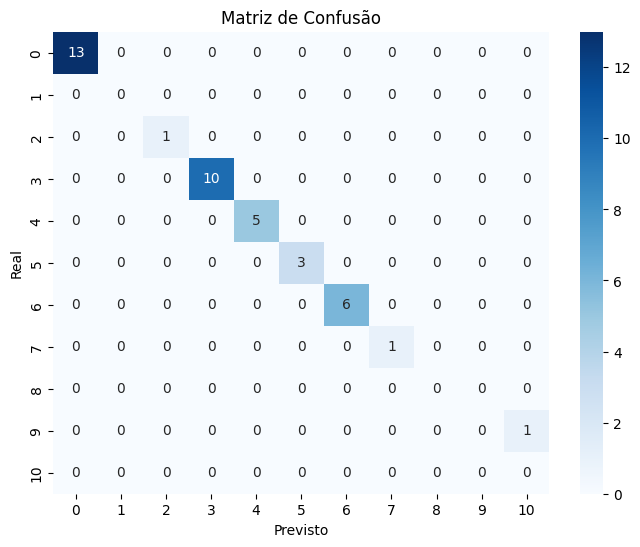

In [33]:
# Plote a matriz de confusão
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=tipos)

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    # Mostra os tipos invés dos números
    # xticklabels=tipos,
    # yticklabels=tipos,
)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()